In [1]:
# Import all required libraries 

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

# Load data & read data using pandas

In [2]:
# Import avacado data files using pandas

df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/Customer_Churn_Analysis.csv")

In [3]:
# Check dataframe's column wise data 

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Rename dataframe's columns as below

df.rename(columns={'account length':'account_len','area code':'area_code','phone number':'phone_num','international plan':'international_plan','total eve minutes':'total_eve_min','total eve calls':'total_eve_calls','total night charge':'total_night_charge','total intl minutes':'total_intl_min','total intl calls':'total_intl_calls','total intl charge':'total_intl_charge','voice mail plan':'voice_mail_plan','customer service calls':'cust_service_calls'}, inplace=True)
print(df.columns)

Index(['state', 'account_len', 'area_code', 'phone_num', 'international_plan',
       'voice_mail_plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total_eve_min',
       'total_eve_calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total_night_charge', 'total_intl_min',
       'total_intl_calls', 'total_intl_charge', 'cust_service_calls', 'churn'],
      dtype='object')


In [5]:
df.head(1)

,state,account_len,area_code,phone_num,international_plan,voice_mail_plan,number vmail messages,total day minutes,total day calls,total day charge,...,total_eve_calls,total eve charge,total night minutes,total night calls,total_night_charge,total_intl_min,total_intl_calls,total_intl_charge,cust_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [6]:
# Checking for null values & data types of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  3333 non-null   object 
 1   account_len            3333 non-null   int64  
 2   area_code              3333 non-null   int64  
 3   phone_num              3333 non-null   object 
 4   international_plan     3333 non-null   object 
 5   voice_mail_plan        3333 non-null   object 
 6   number vmail messages  3333 non-null   int64  
 7   total day minutes      3333 non-null   float64
 8   total day calls        3333 non-null   int64  
 9   total day charge       3333 non-null   float64
 10  total_eve_min          3333 non-null   float64
 11  total_eve_calls        3333 non-null   int64  
 12  total eve charge       3333 non-null   float64
 13  total night minutes    3333 non-null   float64
 14  total night calls      3333 non-null   int64  
 15  tota

In [7]:
# Check distribution of categorical feature

df.describe(include=['O'])

,state,phone_num,international_plan,voice_mail_plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,333-5729,no,no
freq,106,1,3010,2411


Highest customer churn volumn available in State WV for Phone_num 410-3503

In [8]:
# class distribution of target 
print(df.groupby('churn').size())

churn
False    2850
True      483
dtype: int64


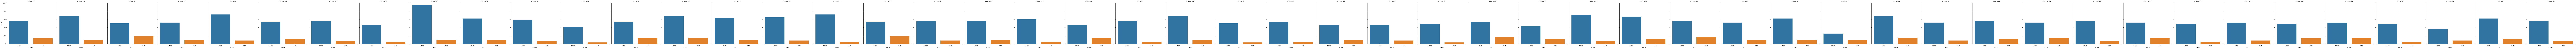

In [9]:
# build bar plots of loan prediction fraud dataset feature 'churn' splits over the feature 'state'
sns.factorplot(x='churn', col='state', kind='count', data=df);

In [10]:
# class distribution of target 
print(df.groupby('state').size())

state
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
dtype: int64


In [11]:
# class distribution of target 
print(df.groupby('phone_num').size())

phone_num
327-1058    1
327-1319    1
327-3053    1
327-3587    1
327-3850    1
           ..
422-7728    1
422-8268    1
422-8333    1
422-8344    1
422-9964    1
Length: 3333, dtype: int64


In [12]:
# class distribution of target 
print(df.groupby('international_plan').size())

international_plan
no     3010
yes     323
dtype: int64


In [13]:
# class distribution of target 
print(df.groupby('voice_mail_plan').size())

voice_mail_plan
no     2411
yes     922
dtype: int64


# Convert all columns datatypes into interger using LabelEncoder

In [14]:

# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['state', 'phone_num', 'international_plan', 'voice_mail_plan', 'total day minutes', 'total day charge', 'total_eve_min', 'total eve charge', 'total night minutes', 'total_night_charge', 'total_intl_min','total_intl_charge', 'churn'
]  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   state                  3333 non-null   int32
 1   account_len            3333 non-null   int64
 2   area_code              3333 non-null   int64
 3   phone_num              3333 non-null   int32
 4   international_plan     3333 non-null   int32
 5   voice_mail_plan        3333 non-null   int32
 6   number vmail messages  3333 non-null   int64
 7   total day minutes      3333 non-null   int64
 8   total day calls        3333 non-null   int64
 9   total day charge       3333 non-null   int64
 10  total_eve_min          3333 non-null   int64
 11  total_eve_calls        3333 non-null   int64
 12  total eve charge       3333 non-null   int64
 13  total night minutes    3333 non-null   int64
 14  total night calls      3333 non-null   int64
 15  total_night_charge     3333 non-null  

In [16]:
df.tail()

,state,account_len,area_code,phone_num,international_plan,voice_mail_plan,number vmail messages,total day minutes,total day calls,total day charge,...,total_eve_calls,total eve charge,total night minutes,total night calls,total_night_charge,total_intl_min,total_intl_calls,total_intl_charge,cust_service_calls,churn
3328,3,192,415,3057,0,1,36,618,77,618,...,126,829,1433,83,801,78,6,78,2,0
3329,49,68,415,1528,0,0,0,1269,57,1269,...,55,349,705,123,420,75,4,75,3,0
3330,39,28,510,42,0,0,0,833,109,833,...,58,1322,711,91,423,120,6,120,2,0
3331,6,184,510,1331,1,0,0,1123,105,1123,...,84,394,266,137,191,29,10,29,2,0
3332,42,74,415,2559,0,1,25,1292,113,1292,...,82,1203,1156,77,643,116,4,116,0,0


# Statistical Data Analysis -

In [17]:
df.shape

(3333, 21)

In [18]:
df.describe()

,state,account_len,area_code,phone_num,international_plan,voice_mail_plan,number vmail messages,total day minutes,total day calls,total day charge,...,total_eve_calls,total eve charge,total night minutes,total night calls,total_night_charge,total_intl_min,total_intl_calls,total_intl_charge,cust_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,1666.00000,0.096910,0.276628,8.099010,826.339634,100.435644,826.339634,...,100.114311,715.447645,793.796580,100.107711,463.044404,81.478548,4.479448,81.478548,1.562856,0.144914
std,14.824911,39.822106,42.371290,962.29855,0.295879,0.447398,13.688365,417.413913,20.069084,417.413913,...,19.922625,352.373293,399.771092,19.568609,209.589781,27.420275,2.461214,27.420275,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,833.00000,0.000000,0.000000,0.000000,508.000000,87.000000,508.000000,...,87.000000,447.000000,484.000000,87.000000,312.000000,64.000000,3.000000,64.000000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,1666.00000,0.000000,0.000000,0.000000,820.000000,101.000000,820.000000,...,100.000000,717.000000,795.000000,100.000000,462.000000,82.000000,4.000000,82.000000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,2499.00000,0.000000,1.000000,20.000000,1146.000000,114.000000,1146.000000,...,114.000000,982.000000,1103.000000,113.000000,616.000000,100.000000,6.000000,100.000000,2.000000,0.000000
max,50.000000,243.000000,510.000000,3332.00000,1.000000,1.000000,51.000000,1666.000000,165.000000,1666.000000,...,170.000000,1439.000000,1590.000000,175.000000,932.000000,161.000000,20.000000,161.000000,9.000000,1.000000


# EDA - Analyse the data set stats using plots

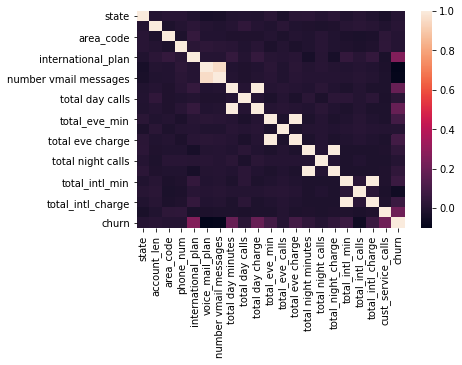

In [19]:
# checking correlation using heatmap
dfcor=df.corr()
sns.heatmap(dfcor)

As per above plot these columns are correlated 'voice_mail_plan',''number vmail messages'& rest of the columns not highly co-related.

# Data Visualization - Unvariate plot / Multivariate Plots

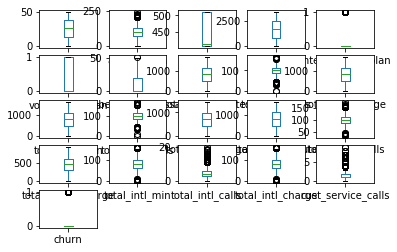

In [20]:
# Data Visualization - Unvariate plot (box and whisker plots)
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

In [21]:
# Checking for skewness for each of the column
df.skew()

state                   -0.064618
account_len              0.096606
area_code                1.126823
phone_num                0.000000
international_plan       2.726332
voice_mail_plan          0.999140
number vmail messages    1.264824
total day minutes        0.017729
total day calls         -0.111787
total day charge         0.017729
total_eve_min            0.017071
total_eve_calls         -0.055563
total eve charge         0.021227
total night minutes      0.012442
total night calls        0.032500
total_night_charge       0.014460
total_intl_min          -0.136370
total_intl_calls         1.321478
total_intl_charge       -0.136370
cust_service_calls       1.091359
churn                    2.018356
dtype: float64

In [22]:
# Check for the outliers,apply zscore & remove skewness

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(3333, 21)
(2901, 21)


In [23]:
# Separating target & input variables
import numpy as np

df_x=df_final.drop(columns=["churn"])
y=df_final[["churn"]]

In [24]:
# scalling the input variable
# linear regression algorith requires all feature to be on common scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [25]:
# lets again check for skewness
x.skew()

state                   -0.058943
account_len              0.081808
area_code                1.150164
phone_num                0.008379
international_plan       0.000000
voice_mail_plan          1.023457
number vmail messages    1.287871
total day minutes        0.029430
total day calls          0.009205
total day charge         0.029430
total_eve_min            0.009564
total_eve_calls         -0.015205
total eve charge         0.013331
total night minutes     -0.002071
total night calls        0.012204
total_night_charge       0.001548
total_intl_min          -0.145231
total_intl_calls         0.724645
total_intl_charge       -0.145231
cust_service_calls       0.722340
dtype: float64

Prepare input feature list as per above skewness by excluding non-corelated columns & skewed columns

In [26]:
import pandas as pd
X = df[['state','account_len','phone_num','international_plan', 'total day minutes', 'total day charge', 'total_eve_min', 'total eve charge', 'total night minutes','total night calls','total_night_charge', 'total_intl_min','total_intl_calls','total_intl_charge']]
y = df.churn        # y is a vector, hence we use dot to access 'label'

In [27]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(3333, 14)


In [28]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(3333,)


In [29]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.857


In [32]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score

cross_val_score(logreg, X, y, cv=20, scoring='roc_auc').mean()

0.6060269870974097

In [33]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
# Grid Search for Algorithm Tuning

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# load the datasets
dataset = df

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)    
print(grid)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.10401216174645145
1.0


In [35]:
# Randomized Search for Algorithm Tuning

import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# load the datasets
dataset = df

# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}

# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train) 
print(rsearch)

# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B6AF586C88>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.10401174775151231
0.9868844262998214


In [36]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.859411 (0.011121)
LDA: 0.850402 (0.009569)
KNN: 0.857250 (0.012590)
CART: 0.845692 (0.020196)
NB: 0.849967 (0.012415)
SVM: 0.854264 (0.000286)


In [37]:
# Import required libraries 

import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [40]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=5,scoring='accuracy')

# train model 
knn.fit(X_train, y_train)
#print(knn.score(X_train,y_train))

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=20)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score: [0.87706147 0.85757121 0.87106447 0.85285285 0.86636637]
mean score: 0.8649832741287014
stn deviation: 0.008796162888567821
Y prediction values
[1 0 0 ... 0 0 1]
y_pred.shape (3333,)


0.864986498649865

In [41]:
from sklearn.externals import joblib

joblib_file = "joblib_knn.pkl"             # Save to file in the current working directory
joblib.dump(knn, joblib_file)
joblib_knn = joblib.load(joblib_file)      # Load from file
score = joblib_knn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for linear Logistic: {0:.2f} %".format(100 * score))

Test score for linear regression: 86.70 %


Conclusion-Customer churn Ananlysis dataset shows best accuracy score is 86% for KNN model with logistic regression & test core is 86%